# 2021 금융데이터 경진대회

# 라이브러리 및 데이터

In [65]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
import warnings
from sklearn.metrics import roc_auc_score, roc_curve
warnings.filterwarnings(action='ignore')
%matplotlib inline

# 버전 확인

In [27]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('sklearn : %s'%(sk.__version__))
print('matplotlib : %s'%(matplotlib.__version__))
print('seaborn : %s'%(sns.__version__))

Pandas : 1.2.4
Numpy : 1.20.1
sklearn : 0.24.1
matplotlib : 3.3.4
seaborn : 0.11.1


# 데이터 불러오기

In [28]:
data=pd.read_csv('C:/Users/HCJ/Desktop/2021_Summer/Finance_data/bank.csv')
print(data.shape)
data.head()

(119535, 94)


,Unnamed: 0,TARGET,J_F1_LON_RK_3M_CNT_RE,J_F1_OTHER_LON_6M_AVBL_AM_RE,J_F1_OTHER_LON_MAX_3M_AM_RE,J_SHINBO_GIBO_AM_RE,J_TOT_LON_CNT_RE,J_TOT_LON_AGG_AM_RE,J_TOT_LON_MAX_AM_RE,J_DPS_CT_BAL_AM_RE,...,P_BR_CNTC_1M_CNT_RE,P_BR_CNTC_6M_CNT_RE,P_ATM_CNTC_6M_CNT_RE,P_INT_CNTC_6M_CNT_RE,P_TOT_LON_CNT_RE,P_TOT_LON_AGG_AM_RE,P_TOT_TS_6M_CNT_RE,P_TOT_TS_6M_AM_RE,P_OB_TS_6M_CNT_RE,P_OB_TS_6M_AM_RE
0,1,0,2,3,4,1,2,3,3,1,...,1,1,1,1,1,1,1,1,1,1
1,2,0,1,2,3,1,1,1,1,3,...,1,3,3,1,1,1,3,3,3,3
2,3,0,2,3,4,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,4,0,3,3,4,1,4,4,4,1,...,3,3,3,1,3,3,1,1,1,1
4,5,0,3,3,4,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
# 결측치 확인
pd.options.display.min_rows = 93
checknull=data.isnull().sum()
checknull
print("Columns that has null data : %d"%(checknull[checknull>0].shape))
print(checknull[checknull>0])

Columns that has null data : 0
Series([], dtype: int64)


# 통합 데이터 전처리

In [29]:
import pandas as pd
data=pd.read_csv('C:/Users/HCJ/Desktop/2021_Summer/Finance_data/bank.csv')
Y=data['TARGET']
X=data.drop(['Unnamed: 0','TARGET'],axis=1)
X.iloc[:,[42,43,44,63,64,65,66,67]] = X.iloc[:,[42,43,44,63,64,65,66,67]].astype('category')
X.iloc[:,[42,43,44,63,64,65,66,67]]=X.iloc[:,[42,43,44,63,64,65,66,67]].replace([1,2],[0,1])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=1004)

from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[42,43,44,63,64,65,66,67], random_state=1004)
X_smotenc, Y_smotenc = smote_nc.fit_resample(X_train, Y_train)

# 탐색적 자료분석

# Exploratory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119535 entries, 0 to 119534
Data columns (total 94 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Unnamed: 0                    119535 non-null  int64
 1   TARGET                        119535 non-null  int64
 2   J_F1_LON_RK_3M_CNT_RE         119535 non-null  int64
 3   J_F1_OTHER_LON_6M_AVBL_AM_RE  119535 non-null  int64
 4   J_F1_OTHER_LON_MAX_3M_AM_RE   119535 non-null  int64
 5   J_SHINBO_GIBO_AM_RE           119535 non-null  int64
 6   J_TOT_LON_CNT_RE              119535 non-null  int64
 7   J_TOT_LON_AGG_AM_RE           119535 non-null  int64
 8   J_TOT_LON_MAX_AM_RE           119535 non-null  int64
 9   J_DPS_CT_BAL_AM_RE            119535 non-null  int64
 10  J_TOT_DPS_1M_AVBL_AM_RE       119535 non-null  int64
 11  J_TOT_DPS_6M_AVBL_AM_RE       119535 non-null  int64
 12  J_CORE_DPS_1M_AVBL_AM_RE      119535 non-null  int64
 13  J_CORE_DPS_6M_

<AxesSubplot:>

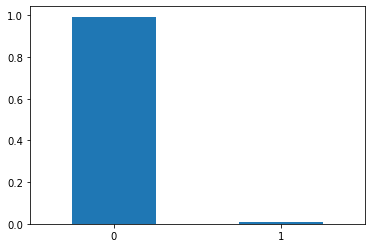

In [9]:
# 샘플링 미적용
#'TARGET'데이터의 분포(불균형이 심함)
data['TARGET'].value_counts(normalize=True).plot(kind='bar',rot=0)

In [10]:
print(data['TARGET'].value_counts())

0    118720
1       815
Name: TARGET, dtype: int64


In [11]:
print("Proportion of TARGET data")
print(data['TARGET'].value_counts(normalize=True))

Proportion of TARGET data
0    0.993182
1    0.006818
Name: TARGET, dtype: float64


<AxesSubplot:>

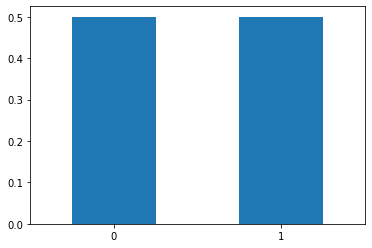

In [12]:
# 샘플링 적용
Y_smotenc.value_counts(normalize=True).plot(kind='bar',rot=0)

In [13]:
Y_smotenc.value_counts()

0    83112
1    83112
Name: TARGET, dtype: int64

In [14]:
Y_smotenc.value_counts(normalize=True)

0    0.5
1    0.5
Name: TARGET, dtype: float64

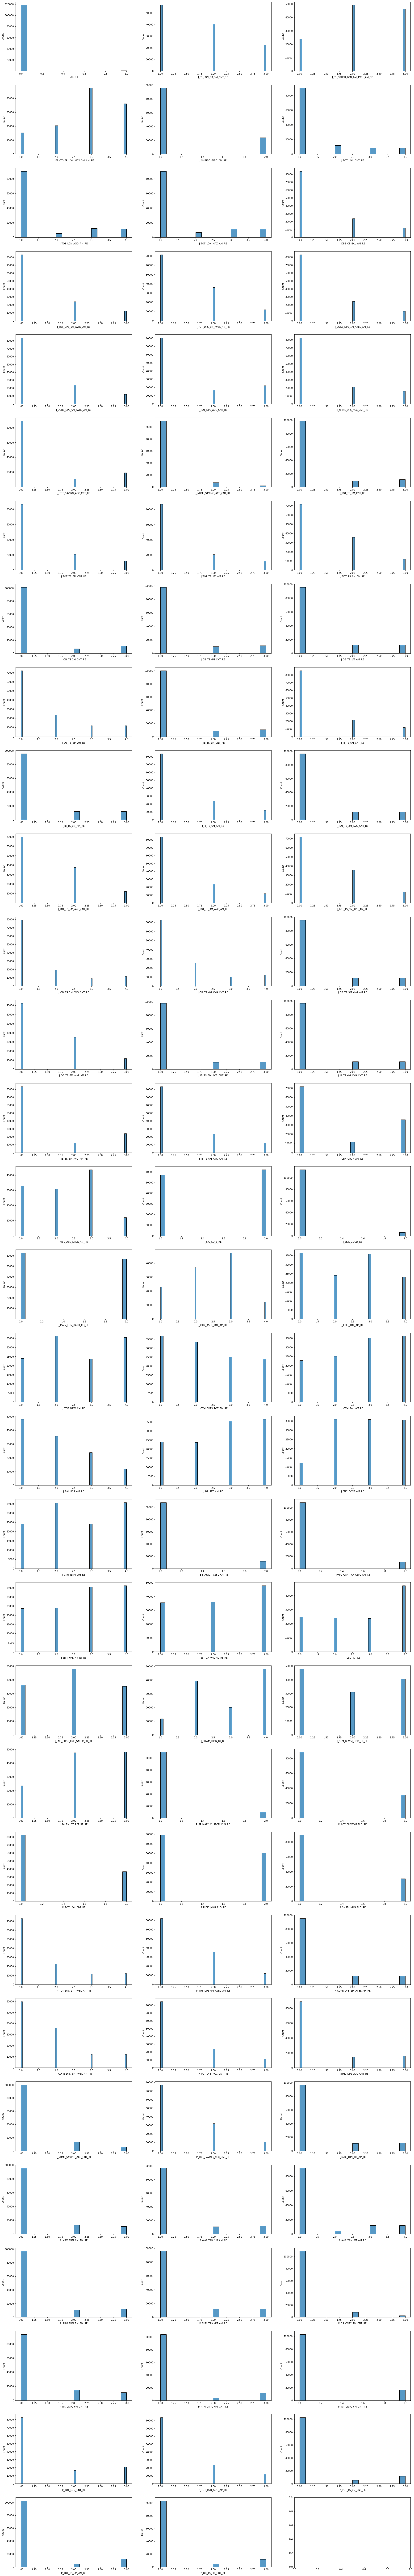

In [15]:
# 샘플링 미적용
#'TARGER'데이터를 제외한 데이터들의 분포.
fig, axes = plt.subplots(31,3)
fig.set_size_inches(30,200)
axx=axes.flatten()

for i in range(93):
    col_index=i+1
    if col_index == 93 : break
    sns.histplot(data[data.columns[col_index]],ax=axx[i])

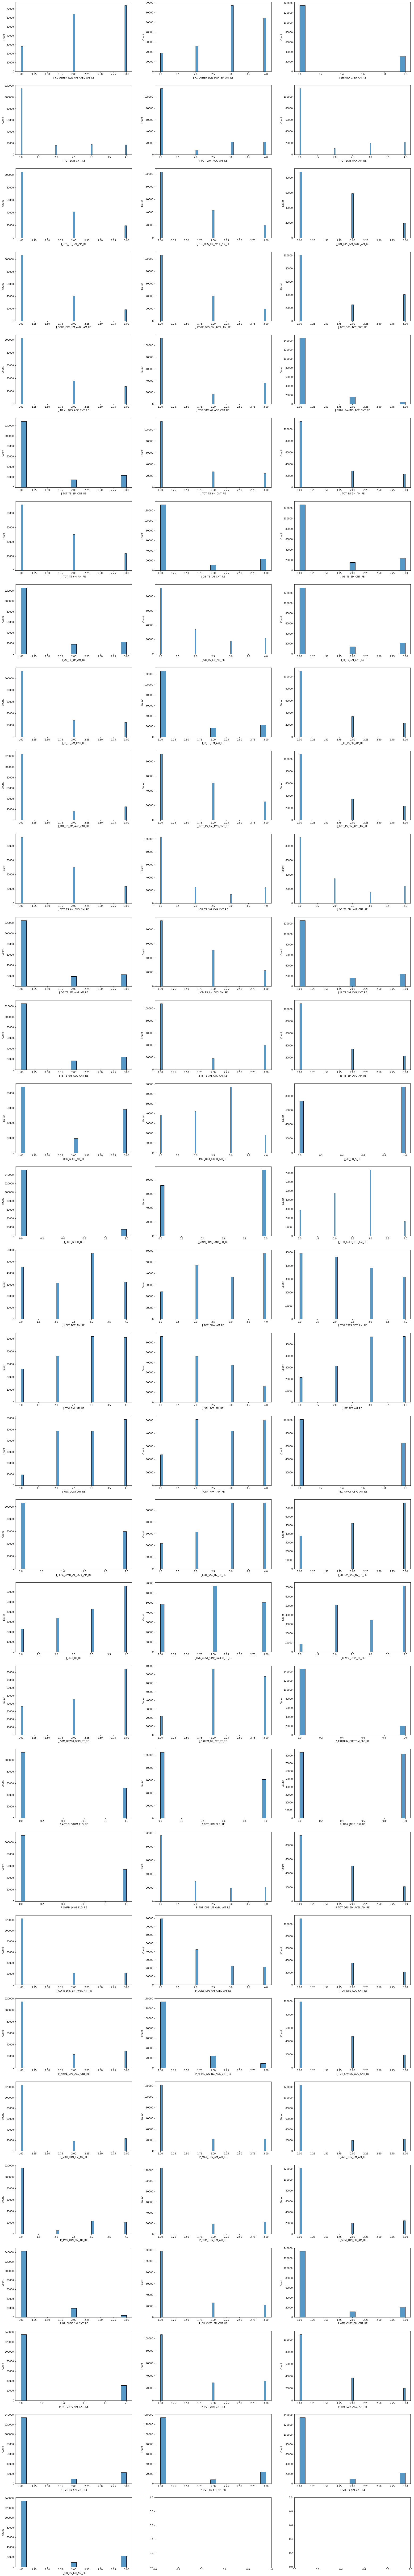

In [16]:
# 샘플링 적용
#오버샘플링 후 TARGER'데이터를 제외한 데이터들의 분포.
fig, axes = plt.subplots(31,3)
fig.set_size_inches(30,200)
axx=axes.flatten()

for i in range(92):
    col_index=i+1
    if col_index == 92 : break
    sns.histplot(X_smotenc[X_smotenc.columns[col_index]],ax=axx[i])

# 모델구축 및 학습

In [63]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label = 'ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()

# Logistic Regression

accuracy
0.9928334402275453 

   precision    recall   f1score  support
0   0.992944  0.999888  0.996404  35608.0
1   0.000000  0.000000  0.000000    253.0 

AUC
0.9220464846466088


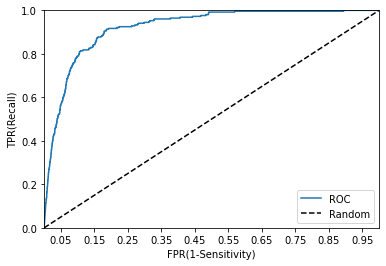

In [76]:
#샘플링 미적용
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter = 1000)
log.fit(X_train,Y_train)
Y_pred_log=log.predict(X_test)

#성능평가
from sklearn import metrics
log_accuracy=metrics.accuracy_score(Y_test,Y_pred_log)
log_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_log)
print('accuracy')
print(log_accuracy,'\n')
log_score = pd.DataFrame(log_score).transpose()
log_score.columns =["precision", "recall", "f1score", "support"]
print(log_score,'\n')
print('AUC')
predict_prob_log=log.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_log)
print(roc_auc_score(Y_test, predict_prob_log))

accuracy
0.8517609659518697 

   precision    recall   f1score  support
0   0.998519  0.851971  0.919442  35608.0
1   0.037963  0.822134  0.072575    253.0 

AUC
0.8962203612813393


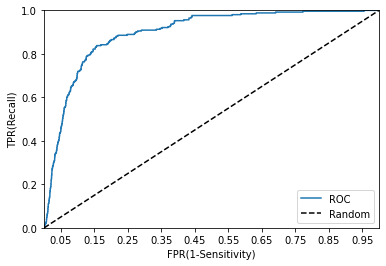

In [77]:
#샘플링 적용
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter = 1000)
log.fit(X_smotenc,Y_smotenc)
Y_pred_log=log.predict(X_test)

#성능평가
from sklearn import metrics
log_accuracy=metrics.accuracy_score(Y_test,Y_pred_log)
log_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_log)
print('accuracy')
print(log_accuracy,'\n')
log_score = pd.DataFrame(log_score).transpose()
log_score.columns =["precision", "recall", "f1score", "support"]
print(log_score,'\n')
print('AUC')
predict_prob_log=log.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_log)
print(roc_auc_score(Y_test, predict_prob_log))

# Decision Tree

accuracy
0.9929449820138869 

   precision  recall  f1score  support
0   0.992945     1.0  0.99646  35608.0
1   0.000000     0.0  0.00000    253.0 

AUC
0.9086865277865347


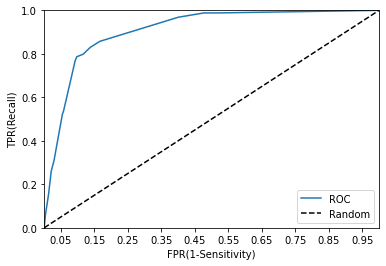

In [78]:
#샘플링 미적용
from sklearn.tree import DecisionTreeClassifier
t1=DecisionTreeClassifier(max_depth=4, min_samples_split=50, min_samples_leaf=25, random_state=1004)
t1.fit(X_train,Y_train)
Y_pred_dt=t1.predict(X_test)

#성능평가
tree_accuracy=metrics.accuracy_score(Y_test,Y_pred_dt)
tree_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_dt)
print('accuracy')
print(tree_accuracy,'\n')
tree_score = pd.DataFrame(tree_score).transpose()
tree_score.columns =["precision", "recall", "f1score", "support"]
print(tree_score,'\n')
print('AUC')
predict_prob_tree=t1.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_tree)
print(roc_auc_score(Y_test, predict_prob_tree))

accuracy
0.7400239814840635 

   precision    recall   f1score  support
0   0.998861  0.739019  0.849515  35608.0
1   0.023434  0.881423  0.045655    253.0 

AUC
0.8965760680861342


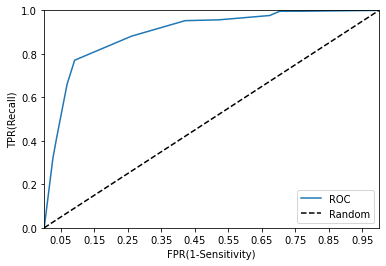

In [112]:
#샘플링 적용
from sklearn.tree import DecisionTreeClassifier
t1=DecisionTreeClassifier(max_depth=4, min_samples_split=50, min_samples_leaf=25, random_state=1004)
t1.fit(X_smotenc,Y_smotenc)
Y_pred_dt=t1.predict(X_test)

#성능평가
tree_accuracy=metrics.accuracy_score(Y_test,Y_pred_dt)
tree_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_dt)
print('accuracy')
print(tree_accuracy,'\n')
tree_score = pd.DataFrame(tree_score).transpose()
tree_score.columns =["precision", "recall", "f1score", "support"]
print(tree_score,'\n')
print('AUC')
predict_prob_tree=t1.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_tree)
print(roc_auc_score(Y_test, predict_prob_tree))

accuracy
0.9901006664621734 

   precision    recall   f1score  support
0   0.997376  0.992642  0.995003  35608.0
1   0.379147  0.632411  0.474074    253.0 

AUC
0.8245399732528907


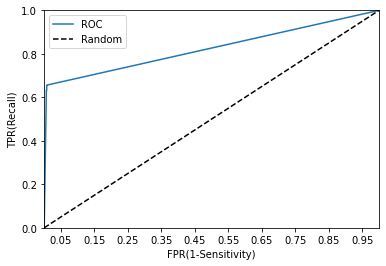

In [110]:
#샘플링 적용
#default
from sklearn.tree import DecisionTreeClassifier
t1=DecisionTreeClassifier(random_state=1004)
t1.fit(X_smotenc,Y_smotenc)
Y_pred_dt=t1.predict(X_test)

#성능평가
tree_accuracy=metrics.accuracy_score(Y_test,Y_pred_dt)
tree_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_dt)
print('accuracy')
print(tree_accuracy,'\n')
tree_score = pd.DataFrame(tree_score).transpose()
tree_score.columns =["precision", "recall", "f1score", "support"]
print(tree_score,'\n')
print('AUC')
predict_prob_tree=t1.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_tree)
print(roc_auc_score(Y_test, predict_prob_tree))

# Random Forest

accuracy
0.9929449820138869 

   precision  recall  f1score  support
0   0.992945     1.0  0.99646  35608.0
1   0.000000     0.0  0.00000    253.0 

AUC
0.9141935173780729


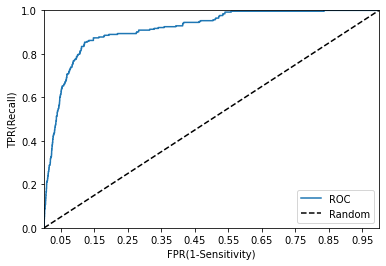

In [82]:
#샘플링 미적용
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=1004)
clf.fit(X_train,Y_train)
Y_pred_rf=clf.predict(X_test)

#성능평가
forest_accuracy=metrics.accuracy_score(Y_test,Y_pred_rf)
forest_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_rf)
print('accuracy')
print(forest_accuracy,'\n')
forest_score = pd.DataFrame(forest_score).transpose()
forest_score.columns = ["precision", "recall", "f1score", "support"]
print(forest_score,'\n')
print('AUC')
predict_prob_RF=clf.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_RF)
print(roc_auc_score(Y_test, predict_prob_RF))

accuracy
0.8839965422046234 

   precision    recall   f1score  support
0   0.998447  0.884548  0.938053  35608.0
1   0.047277  0.806324  0.089317    253.0 

AUC
0.9174208531546404


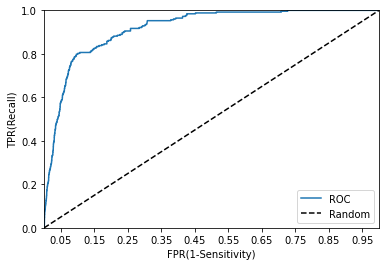

In [83]:
#샘플링 적용
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=1004)
clf.fit(X_smotenc,Y_smotenc)
Y_pred_rf=clf.predict(X_test)

#성능평가
forest_accuracy=metrics.accuracy_score(Y_test,Y_pred_rf)
forest_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_rf)
print('accuracy')
print(forest_accuracy,'\n')
forest_score = pd.DataFrame(forest_score).transpose()
forest_score.columns = ["precision", "recall", "f1score", "support"]
print(forest_score,'\n')
print('AUC')
predict_prob_RF=clf.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_RF)
print(roc_auc_score(Y_test, predict_prob_RF))

# Multi Layer Perceptron

accuracy
0.9929449820138869 

   precision  recall  f1score  support
0   0.992945     1.0  0.99646  35608.0
1   0.000000     0.0  0.00000    253.0 

AUC
0.9037689602993687


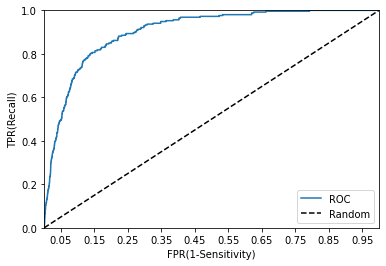

In [90]:
#샘플링 미적용
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', 
                    solver='sgd', alpha=0.01, batch_size=32,learning_rate_init=0.1, 
                    max_iter=500)  
mlp.fit(X_train,Y_train)
Y_pred_mlp = mlp.predict(X_test)

#성능 평가
mlp_accuracy=metrics.accuracy_score(Y_test,Y_pred_mlp)
mlp_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_mlp)
print('accuracy')
print(mlp_accuracy,'\n')
mlp_score = pd.DataFrame(mlp_score).transpose()
mlp_score.columns = ["precision", "recall", "f1score", "support"]
print(mlp_score,'\n')
print('AUC')
predict_prob_mlp=mlp.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_mlp)
print(roc_auc_score(Y_test, predict_prob_mlp))

accuracy
0.8465742728869803 

   precision    recall   f1score  support
0   0.998675  0.846608  0.916375  35608.0
1   0.037533  0.841897  0.071862    253.0 

AUC
0.9010260939718657


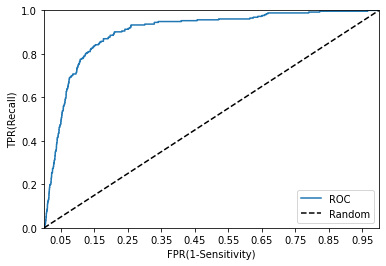

In [91]:
#샘플링 적용
mlp = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', 
                    solver='sgd', alpha=0.01, batch_size=32,learning_rate_init=0.1, 
                    max_iter=500)  
mlp.fit(X_smotenc, Y_smotenc)
Y_pred_mlp = mlp.predict(X_test)

#성능 평가
mlp_accuracy=metrics.accuracy_score(Y_test,Y_pred_mlp)
mlp_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_mlp)
print('accuracy')
print(mlp_accuracy,'\n')
mlp_score = pd.DataFrame(mlp_score).transpose()
mlp_score.columns = ["precision", "recall", "f1score", "support"]
print(mlp_score,'\n')
print('AUC')
predict_prob_mlp=mlp.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_mlp)
print(roc_auc_score(Y_test, predict_prob_mlp))

# Multi Layer Perceptron with bagging

accuracy
0.9929449820138869 

   precision  recall  f1score  support
0   0.992945     1.0  0.99646  35608.0
1   0.000000     0.0  0.00000    253.0 

AUC
0.6526825809894832


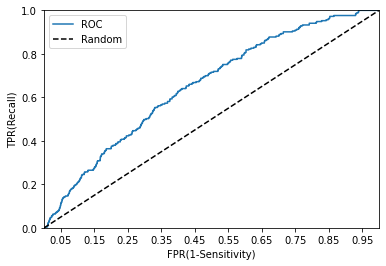

In [92]:
#샘플링 미적용
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', 
                                          solver='sgd', alpha=0.01, batch_size=32,learning_rate_init=0.1, 
                                          max_iter=500),
                           n_estimators=500,
                           max_samples=100,
                           bootstrap=True,
                           n_jobs=-1)
model = bag_clf.fit(X_train,Y_train)
y_pred = model.predict(X_test)

#성능 평가
mlpb_accuracy=metrics.accuracy_score(Y_test,y_pred)
mlpb_score=metrics.precision_recall_fscore_support(Y_test,y_pred)
print('accuracy')
print(mlpb_accuracy,'\n')
mlpb_score = pd.DataFrame(mlpb_score).transpose()
mlpb_score.columns = ["precision", "recall", "f1score", "support"]
print(mlpb_score,'\n')
print('AUC')
predict_prob_bag=model.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_bag)
print(roc_auc_score(Y_test, predict_prob_bag))

accuracy
0.746716488664566 

   precision    recall   f1score  support
0   0.998721  0.745872  0.853973  35608.0
1   0.023630  0.865613  0.046004    253.0 

AUC
0.8631417929798606


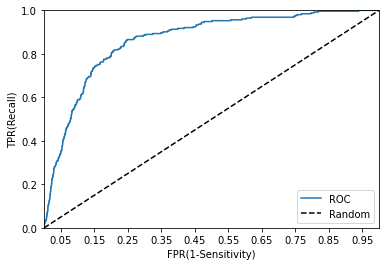

In [94]:
#샘플링 적용
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', 
                                          solver='sgd', alpha=0.01, batch_size=32,learning_rate_init=0.1, 
                                          max_iter=500),
                           n_estimators=500,
                           max_samples=100,
                           bootstrap=True,
                           n_jobs=-1)
model = bag_clf.fit(X_smotenc, Y_smotenc)
y_pred = model.predict(X_test)

#성능 평가
mlpb_accuracy=metrics.accuracy_score(Y_test,y_pred)
mlpb_score=metrics.precision_recall_fscore_support(Y_test,y_pred)
print('accuracy')
print(mlpb_accuracy,'\n')
mlpb_score = pd.DataFrame(mlpb_score).transpose()
mlpb_score.columns = ["precision", "recall", "f1score", "support"]
print(mlpb_score,'\n')
print('AUC')
predict_prob_bag=model.predict_proba(X_test)[:,1]
roc_curve_plot(Y_test, predict_prob_bag)
print(roc_auc_score(Y_test, predict_prob_bag))

# Factorization Machine

accuracy
0.9929449820138869 

   precision  recall  f1score  support
0   0.992945     1.0  0.99646  35608.0
1   0.000000     0.0  0.00000    253.0 

AUC
0.6843200066956575


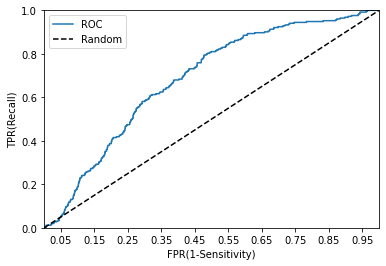

In [96]:
#샘플링 미적용
import xlearn as xl
import numpy as np
# DMatrix transition, if use field ,use must pass field map(an array) of features
xdm_train = xl.DMatrix(X_train,Y_train)
xdm_test = xl.DMatrix(X_test, Y_test)

# Training task
fm_model = xl.create_fm()  # Use factorization machine
fm_model.setTrain(xdm_train)    # Training data
fm_model.setValidate(xdm_test)  # Validation data

# param:
#  0. regression task
#  1. learning rate: 0.2
#  2. regular lambda: 0.002
#  3. evaluation metric: mae
param = {'task':'binary', 'lr':0.03,
         'lambda':0.0001, 'metric':'acc'}

# Start to train
fm_model.fit(param, './modeldm.out')

# Prediction task
fm_model.setTest(xdm_test)  # Test data
predict_prob_fm = fm_model.predict("./modeldm.out")

fm_model.setSign() # Convert output to 0,1

Y_pred_fm = fm_model.predict("./modeldm.out")

#성능 평가
from sklearn import metrics
fm_accuracy=metrics.accuracy_score(Y_test,Y_pred_fm)
fm_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_fm)
print('accuracy')
print(fm_accuracy, '\n')
fm_score = pd.DataFrame(fm_score).transpose()
fm_score.columns = ["precision", "recall", "f1score", "support"]
print(fm_score, '\n')
print('AUC')
roc_curve_plot(Y_test, predict_prob_fm)
print(roc_auc_score(Y_test, predict_prob_fm))

accuracy
0.8215889127464376 

   precision    recall   f1score  support
0   0.997988  0.821978  0.901472  35608.0
1   0.029695  0.766798  0.057177    253.0 

AUC
0.8613441110626647


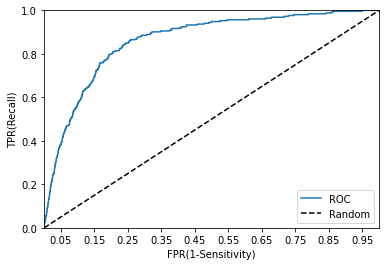

In [97]:
#샘플링 적용
import xlearn as xl
import numpy as np
# DMatrix transition, if use field ,use must pass field map(an array) of features
xdm_train = xl.DMatrix(X_smotenc, Y_smotenc)
xdm_test = xl.DMatrix(X_test, Y_test)

# Training task
fm_model = xl.create_fm()  # Use factorization machine
fm_model.setTrain(xdm_train)    # Training data
fm_model.setValidate(xdm_test)  # Validation data

# param:
#  0. regression task
#  1. learning rate: 0.2
#  2. regular lambda: 0.002
#  3. evaluation metric: mae
param = {'task':'binary', 'lr':0.03,
         'lambda':0.0001, 'metric':'acc'}

# Start to train
fm_model.fit(param, './modeldm.out')

# Prediction task
fm_model.setTest(xdm_test)  # Test data
predict_prob_fm = fm_model.predict("./modeldm.out")

fm_model.setSign() # Convert output to 0,1

Y_pred_fm = fm_model.predict("./modeldm.out")

#성능 평가
from sklearn import metrics
fm_accuracy=metrics.accuracy_score(Y_test,Y_pred_fm)
fm_score=metrics.precision_recall_fscore_support(Y_test,Y_pred_fm)
print('accuracy')
print(fm_accuracy, '\n')
fm_score = pd.DataFrame(fm_score).transpose()
fm_score.columns = ["precision", "recall", "f1score", "support"]
print(fm_score, '\n')
print('AUC')
roc_curve_plot(Y_test, predict_prob_fm)
print(roc_auc_score(Y_test, predict_prob_fm))

# Field-aware Factorization Machine

accuracy
0.9929449820138869
   precision  recall  f1score  support
0   0.992945     1.0  0.99646  35608.0
1   0.000000     0.0  0.00000    253.0 

AUC
0.4866614110787379


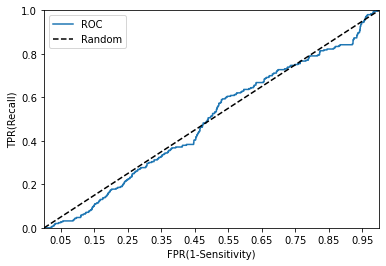

In [98]:
#샘플링 미적용
# 데이터 추가 전처리
train = pd.concat([X_train,Y_train],axis=1)
test = pd.concat([Y_test,X_test],axis=1)
x = pd.concat([train,test])
x = x.reset_index(drop=True)
unwanted = x.columns[x.columns.str.startswith('ps_calc_')]
x.drop(unwanted,inplace=True,axis=1)
features = x.columns[2:]
categories = []
for c in features:
    trainno = len(x.loc[:train.shape[0],c].unique())
    testno = len(x.loc[train.shape[0]:,c].unique())
# 카테고리 피쳐 전처리
x.loc[:,'J_SIC_CD_5_RE'] = pd.cut(x['J_SIC_CD_5_RE'], 50,labels=False)
x.loc[:,'J_SKIL_GDCD_RE'] = pd.cut(x['J_SKIL_GDCD_RE'], 50,labels=False)
x.loc[:,'J_MAIN_LON_BANK_CD_RE'] = pd.cut(x['J_MAIN_LON_BANK_CD_RE'], 50,labels=False)
x.loc[:,'P_PRIMARY_CUSTOM_FLG_RE'] =  pd.cut(x['P_PRIMARY_CUSTOM_FLG_RE'], 50,labels=False)
x.loc[:,'P_ACT_CUSTOM_FLG_RE'] =  pd.cut(x['P_ACT_CUSTOM_FLG_RE'], 50,labels=False)
x.loc[:,'P_TOT_LON_FLG_RE'] =  pd.cut(x['P_TOT_LON_FLG_RE'], 50,labels=False)
x.loc[:,'P_INBK_JNNG_FLG_RE'] =  pd.cut(x['P_INBK_JNNG_FLG_RE'], 50,labels=False)
x.loc[:,'P_SMPB_JNNG_FLG_RE'] =  pd.cut(x['P_SMPB_JNNG_FLG_RE'], 50,labels=False)
    
test = x.loc[train.shape[0]:].copy()
train = x.loc[:train.shape[0]].copy()

# Always good to shuffle for SGD type optimizers
train = train.sample(frac=1).reset_index(drop=True)

# categories, numerics 분리
categories = train.columns[[43,44,45,64,65,66,67,68]]
numerics = train.columns[[1,2,3,4,5,6,7,8,9,10,
                          11,12,13,14,15,16,17,18,19,20,
                          21,22,23,24,25,26,27,28,29,30,
                          31,32,33,34,35,36,37,38,39,40,
                          41,42,46,47,48,49,50,
                          51,52,53,54,55,56,57,58,59,60,
                          61,62,63,69,70,
                          71,72,73,74,75,76,77,78,79,80,
                          81,82,83,84,85,86,87,88,89,90,
                          91,92]]
# LIBSVM 데이터 포맷 변환
currentcode = len(numerics)
catdict = {}
catcodes = {}
for x in numerics:
    catdict[x] = 0
for x in categories:
    catdict[x] = 1

noofrows = train.shape[0]
noofcolumns = len(features)
with open("alltrainffm.txt", "w") as text_file:
    for n, r in enumerate(range(noofrows)):
        datastring = ""
        datarow = train.iloc[r].to_dict()
        datastring += str(int(datarow['TARGET']))


        for i, x in enumerate(catdict.keys()):
            if(catdict[x]==0):
                datastring = datastring + " "+str(i)+":"+ str(i)+":"+ str(datarow[x])
            else:
                if(x not in catcodes):
                    catcodes[x] = {}
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode
                elif(datarow[x] not in catcodes[x]):
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode

                code = catcodes[x][datarow[x]]
                datastring = datastring + " "+str(i)+":"+ str(int(code))+":1"
        datastring += '\n'
        text_file.write(datastring)
        
noofrows = test.shape[0]
noofcolumns = len(features)
with open("alltestffm.txt", "w") as text_file:
    for n, r in enumerate(range(noofrows)):
        datastring = ""
        datarow = test.iloc[r].to_dict()
        datastring += str(int(datarow['TARGET']))


        for i, x in enumerate(catdict.keys()):
            if(catdict[x]==0):
                datastring = datastring + " "+str(i)+":"+ str(i)+":"+ str(datarow[x])
            else:
                if(x not in catcodes):
                    catcodes[x] = {}
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode
                elif(datarow[x] not in catcodes[x]):
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode

                code = catcodes[x][datarow[x]]
                datastring = datastring + " "+str(i)+":"+ str(int(code))+":1"
        datastring += '\n'
        text_file.write(datastring)

import xlearn as xl

# Training task
ffm_model = xl.create_ffm()                # Use field-aware factorization machine (ffm)
ffm_model.setTrain("./alltrainffm.txt")    # Set the path of training dataset
ffm_model.setValidate("./alltestffm.txt")  # Set the path of validation dataset

# Parameters:
#  0. task: binary classification
#  1. learning rate: 0.2
#  2. regular lambda: 0.002
#  3. evaluation metric: accuracy
param = {'task':'binary', 'lr':0.0005,'lambda':0.00001, 'metric':'auc', 'k':10, 'opt':'sgd'}

# Start to train
ffm_model.fit(param, './model.out')

# Prediction task
ffm_model.setTest("./alltestffm.txt")  # Set the path of test dataset
predict_prob_ffm = ffm_model.predict("./modeldm.out")

ffm_model.setSign()                 # Convert output to 0-1

# Start to predict
Y_pred1 = ffm_model.predict("./model.out")

#성능 평가
from sklearn import metrics
ffm_accuracy=metrics.accuracy_score(Y_test,Y_pred1)
ffm_score=metrics.precision_recall_fscore_support(Y_test,Y_pred1)

print('accuracy')
print(ffm_accuracy)
ffm_score = pd.DataFrame(ffm_score).transpose()
ffm_score.columns = ["precision", "recall", "f1score", "support"]
print(ffm_score, '\n')
print('AUC')
roc_curve_plot(Y_test, predict_prob_ffm)
print(roc_auc_score(Y_test, predict_prob_ffm))

accuracy
0.7907476088229553
   precision    recall   f1score  support
0   0.998439  0.790497  0.882382  35608.0
1   0.027253  0.826087  0.052764    253.0 

AUC
0.572389970100426


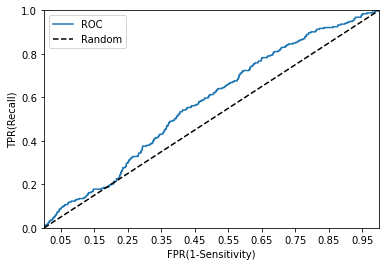

In [113]:
#샘플링 적용
# 데이터 추가 전처리
train = pd.concat([Y_smotenc,X_smotenc],axis=1)
test = pd.concat([Y_test,X_test],axis=1)
x = pd.concat([train,test])
x = x.reset_index(drop=True)
unwanted = x.columns[x.columns.str.startswith('ps_calc_')]
x.drop(unwanted,inplace=True,axis=1)
features = x.columns[2:]
categories = []
for c in features:
    trainno = len(x.loc[:train.shape[0],c].unique())
    testno = len(x.loc[train.shape[0]:,c].unique())
# 카테고리 피쳐 전처리
x.loc[:,'J_SIC_CD_5_RE'] = pd.cut(x['J_SIC_CD_5_RE'], 50,labels=False)
x.loc[:,'J_SKIL_GDCD_RE'] = pd.cut(x['J_SKIL_GDCD_RE'], 50,labels=False)
x.loc[:,'J_MAIN_LON_BANK_CD_RE'] = pd.cut(x['J_MAIN_LON_BANK_CD_RE'], 50,labels=False)
x.loc[:,'P_PRIMARY_CUSTOM_FLG_RE'] =  pd.cut(x['P_PRIMARY_CUSTOM_FLG_RE'], 50,labels=False)
x.loc[:,'P_ACT_CUSTOM_FLG_RE'] =  pd.cut(x['P_ACT_CUSTOM_FLG_RE'], 50,labels=False)
x.loc[:,'P_TOT_LON_FLG_RE'] =  pd.cut(x['P_TOT_LON_FLG_RE'], 50,labels=False)
x.loc[:,'P_INBK_JNNG_FLG_RE'] =  pd.cut(x['P_INBK_JNNG_FLG_RE'], 50,labels=False)
x.loc[:,'P_SMPB_JNNG_FLG_RE'] =  pd.cut(x['P_SMPB_JNNG_FLG_RE'], 50,labels=False)
    
test = x.loc[train.shape[0]:].copy()
train = x.loc[:train.shape[0]].copy()

# Always good to shuffle for SGD type optimizers
train = train.sample(frac=1).reset_index(drop=True)

# categories, numerics 분리
categories = train.columns[[43,44,45,64,65,66,67,68]]
numerics = train.columns[[1,2,3,4,5,6,7,8,9,10,
                          11,12,13,14,15,16,17,18,19,20,
                          21,22,23,24,25,26,27,28,29,30,
                          31,32,33,34,35,36,37,38,39,40,
                          41,42,46,47,48,49,50,
                          51,52,53,54,55,56,57,58,59,60,
                          61,62,63,69,70,
                          71,72,73,74,75,76,77,78,79,80,
                          81,82,83,84,85,86,87,88,89,90,
                          91,92]]
# LIBSVM 데이터 포맷 변환
currentcode = len(numerics)
catdict = {}
catcodes = {}
for x in numerics:
    catdict[x] = 0
for x in categories:
    catdict[x] = 1

noofrows = train.shape[0]
noofcolumns = len(features)
with open("alltrainffm.txt", "w") as text_file:
    for n, r in enumerate(range(noofrows)):
        datastring = ""
        datarow = train.iloc[r].to_dict()
        datastring += str(int(datarow['TARGET']))


        for i, x in enumerate(catdict.keys()):
            if(catdict[x]==0):
                datastring = datastring + " "+str(i)+":"+ str(i)+":"+ str(datarow[x])
            else:
                if(x not in catcodes):
                    catcodes[x] = {}
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode
                elif(datarow[x] not in catcodes[x]):
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode

                code = catcodes[x][datarow[x]]
                datastring = datastring + " "+str(i)+":"+ str(int(code))+":1"
        datastring += '\n'
        text_file.write(datastring)
        
noofrows = test.shape[0]
noofcolumns = len(features)
with open("alltestffm.txt", "w") as text_file:
    for n, r in enumerate(range(noofrows)):
        datastring = ""
        datarow = test.iloc[r].to_dict()
        datastring += str(int(datarow['TARGET']))


        for i, x in enumerate(catdict.keys()):
            if(catdict[x]==0):
                datastring = datastring + " "+str(i)+":"+ str(i)+":"+ str(datarow[x])
            else:
                if(x not in catcodes):
                    catcodes[x] = {}
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode
                elif(datarow[x] not in catcodes[x]):
                    currentcode +=1
                    catcodes[x][datarow[x]] = currentcode

                code = catcodes[x][datarow[x]]
                datastring = datastring + " "+str(i)+":"+ str(int(code))+":1"
        datastring += '\n'
        text_file.write(datastring)

import xlearn as xl

# Training task
ffm_model = xl.create_ffm()                # Use field-aware factorization machine (ffm)
ffm_model.setTrain("./alltrainffm.txt")    # Set the path of training dataset
ffm_model.setValidate("./alltestffm.txt")  # Set the path of validation dataset

# Parameters:
#  0. task: binary classification
#  1. learning rate: 0.2
#  2. regular lambda: 0.002
#  3. evaluation metric: accuracy
param = {'task':'binary', 'lr':0.0005,'lambda':0.00001, 'metric':'auc', 'k':10, 'opt':'sgd'}

# Start to train
ffm_model.fit(param, './model.out')

# Prediction task
ffm_model.setTest("./alltestffm.txt")  # Set the path of test dataset
predict_prob_ffm = ffm_model.predict("./modeldm.out")

ffm_model.setSign()                 # Convert output to 0-1

# Start to predict
Y_pred1 = ffm_model.predict("./model.out")

#성능 평가
from sklearn import metrics
ffm_accuracy=metrics.accuracy_score(Y_test,Y_pred1)
ffm_score=metrics.precision_recall_fscore_support(Y_test,Y_pred1)

print('accuracy')
print(ffm_accuracy)
ffm_score = pd.DataFrame(ffm_score).transpose()
ffm_score.columns = ["precision", "recall", "f1score", "support"]
print(ffm_score, '\n')
print('AUC')
roc_curve_plot(Y_test, predict_prob_ffm)
print(roc_auc_score(Y_test, predict_prob_ffm))

# XG Boost

In [100]:
# 샘플링 미적용
import xgboost as xgb
from xgboost import plot_importance

dtrain=xgb.DMatrix(data=X_train.values, label=Y_train)
dtest=xgb.DMatrix(data=X_test.values, label = Y_test)

params={'max_depth':8,'eta':0.1,'objective':'binary:logistic','eval_metric':'logloss','early_stopping':100}
wlist=[(dtrain,'train'),(dtest,'eval')]
xgb_model=xgb.train(params=params,dtrain=dtrain,num_boost_round=600,early_stopping_rounds=100,evals=wlist)

pred_probs_xg=xgb_model.predict(dtest)
pred_xg=[1 if x>0.5 else 0 for x in pred_probs_xg]

[01:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60048	eval-logloss:0.60066
[1]	train-logloss:0.52451	eval-logloss:0.52482
[2]	train-logloss:0.46124	eval-logloss:0.46169
[3]	train-logloss:0.40775	eval-logloss:0.40829
[4]	train-logloss:0.36206	eval-logloss:0.36274
[5]	train-logloss:0.32269	eval-logloss:0.32355
[6]	train-logloss:0.28857	eval-logloss:0.28961
[7]	train-logloss:0.25879	eval-logloss:0.26003
[8]	train-logloss:0.23271	eval-logloss:0.23408
[9]	train-logloss:0.20976	eval-logloss:0.21128
[10]	train-logloss:0.18950	eval-logloss:0.19119
[11]	train-logloss:0.17158	eval-logloss:0.17344
[12]	train-logloss:0.15569	eval-logloss:

accuracy
0.9961239229246256 

   precision    recall   f1score  support
0    0.99664  0.999466  0.998051  35608.0
1    0.87500  0.525692  0.656790    253.0 

AUC
0.9780547938332461


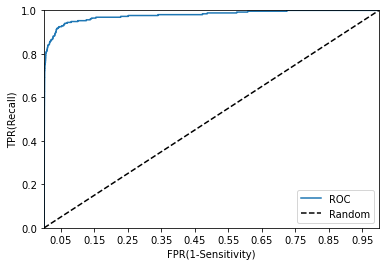

In [101]:
#성능 평가
from sklearn import metrics
xg_accuracy=metrics.accuracy_score(Y_test,pred_xg)
xg_score=metrics.precision_recall_fscore_support(Y_test,pred_xg)

print('accuracy')
print(xg_accuracy,'\n')
xg_score = pd.DataFrame(xg_score).transpose()
xg_score.columns = ["precision", "recall", "f1score", "support"]
print(xg_score,'\n')
print('AUC')
roc_curve_plot(Y_test, pred_probs_xg)
print(roc_auc_score(Y_test, pred_probs_xg))

In [102]:
# 샘플링 적용
import xgboost as xgb
from xgboost import plot_importance

dtrain=xgb.DMatrix(data=X_smotenc.values, label=Y_smotenc)
dtest=xgb.DMatrix(data=X_test.values, label = Y_test)

params={'max_depth':8,'eta':0.1,'objective':'binary:logistic','eval_metric':'logloss','early_stopping':100}
wlist=[(dtrain,'train'),(dtest,'eval')]
xgb_model=xgb.train(params=params,dtrain=dtrain,num_boost_round=600,early_stopping_rounds=100,evals=wlist)

pred_probs_xg=xgb_model.predict(dtest)
pred_xg=[1 if x>0.5 else 0 for x in pred_probs_xg]

[01:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.63018	eval-logloss:0.63088
[1]	train-logloss:0.57537	eval-logloss:0.57690
[2]	train-logloss:0.53099	eval-logloss:0.53350
[3]	train-logloss:0.49399	eval-logloss:0.49753
[4]	train-logloss:0.45883	eval-logloss:0.46350
[5]	train-logloss:0.43108	eval-logloss:0.43652
[6]	train-logloss:0.40575	eval-logloss:0.41228
[7]	train-logloss:0.38486	eval-logloss:0.39259
[8]	train-logloss:0.36334	eval-logloss:0.37167
[9]	train-logloss:0.34413	eval-logloss:0.35337
[10]	train-logloss:0.32480	eval-logloss:0.33502
[11]	train-logloss:0.30694	eval-logloss:0.31825
[12]	train-logloss:0.29385	eval-logloss:

accuracy
0.9952594740804774
   precision    recall   f1score  support
0   0.997222  0.998006  0.997614  35608.0
1   0.684444  0.608696  0.644351    253.0 

AUC
0.9711626622964329


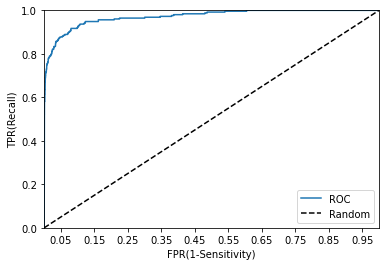

In [103]:
#성능 평가
from sklearn import metrics
xg_accuracy=metrics.accuracy_score(Y_test,pred_xg)
xg_score=metrics.precision_recall_fscore_support(Y_test,pred_xg)

print('accuracy')
print(xg_accuracy)
xg_score = pd.DataFrame(xg_score).transpose()
xg_score.columns = ["precision", "recall", "f1score", "support"]
print(xg_score,'\n')
print('AUC')
roc_curve_plot(Y_test, pred_probs_xg)
print(roc_auc_score(Y_test, pred_probs_xg))

# 결과

In [59]:
# 샘플링 적용
print('Logistic')
print('accuracy')
print(log_accuracy)
print(log_score,'\n')
print('Decision Tree')
print('accuracy')
print(tree_accuracy)
print(tree_score,'\n')
print('Random Forest')
print('accuracy')
print(forest_accuracy)
print(forest_score,'\n')
print('MLP with bagging')
print('accuracy')
print(mlpb_accuracy)
print(mlpb_score,'\n')
print('FM')
print('accuracy')
print(fm_accuracy)
print(fm_score, '\n')
print('FFM')
print('accuracy')
print(ffm_accuracy)
print(ffm_score, '\n')

Logistic
accuracy
0.8517609659518697
   precision    recall   f1score  support
0   0.998519  0.851971  0.919442  35608.0
1   0.037963  0.822134  0.072575    253.0 

Decision Tree
accuracy
0.7400239814840635
   precision    recall   f1score  support
0   0.998861  0.739019  0.849515  35608.0
1   0.023434  0.881423  0.045655    253.0 

Random Forest
accuracy
0.8839965422046234
   precision    recall   f1score  support
0   0.998447  0.884548  0.938053  35608.0
1   0.047277  0.806324  0.089317    253.0 

MLP with bagging
accuracy
0.8081481274922618
   precision    recall   f1score  support
0   0.998404  0.808077  0.893214  35608.0
1   0.029399  0.818182  0.056759    253.0 

FM
accuracy
0.82011098407741
   precision    recall   f1score  support
0   0.998019  0.820462  0.900572  35608.0
1   0.029599  0.770751  0.057009    253.0 

FFM
accuracy
0.8006748278073673
   precision    recall   f1score  support
0   0.998249  0.800663  0.888605  35608.0
1   0.027804  0.802372  0.053746    253.0 



In [114]:
# AUC
print('Logistic         : ',roc_auc_score(Y_test, predict_prob_log))
print('Decision Tree    : ',roc_auc_score(Y_test, predict_prob_tree))
print('Random Forest    : ',roc_auc_score(Y_test, predict_prob_RF))
print('MLP              : ',roc_auc_score(Y_test, predict_prob_mlp))
print('MLP with bagging : ',roc_auc_score(Y_test, predict_prob_bag))
print('FM               : ',roc_auc_score(Y_test, predict_prob_fm))
print('FFM              : ',roc_auc_score(Y_test, predict_prob_ffm))
print('XG boost         : ',roc_auc_score(Y_test, pred_probs_xg))

Logistic         :  0.8962203612813393
Decision Tree    :  0.8965760680861342
Random Forest    :  0.9174208531546404
MLP              :  0.9010260939718657
MLP with bagging :  0.8631417929798606
FM               :  0.8613441110626647
FFM              :  0.572389970100426
XG boost         :  0.9711626622964329
